[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%206/6.4_gym_cartpole.ipynb)

In [ ]:
# Colab에서 Render를 그림파일로 해주기 위한 설정
!apt update
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://

환경은 ?  <TimeLimit<CartPoleEnv<CartPole-v1>>>
행동할수 있는 액션의 수는 ?  Discrete(2)
이동할 수 있는 총 상태의 수는 ?  Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
초기화할 경우 시작 위치는 ?  [0.02418578 0.04816251 0.02180602 0.02219988]
행동을 하고나서 리턴해주는 값은 ?  (array([ 0.02514903,  0.24296506,  0.02225001, -0.26352402]), 1.0, False, {})


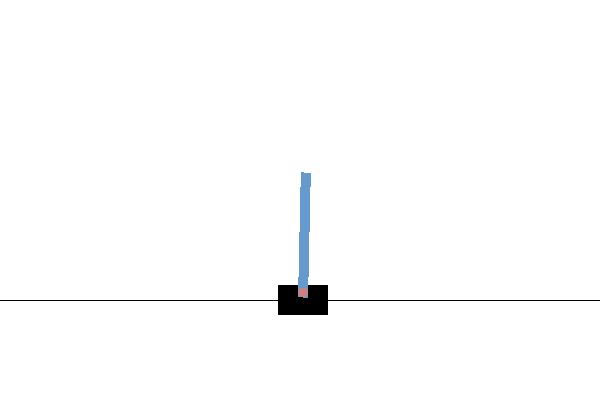

In [ ]:
# 필요한 모듈 설치
import tensorflow as tf
import gym
from IPython import display
import cv2
from pyvirtualdisplay import Display
from IPython import display
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import random
from google.colab.patches import cv2_imshow
%matplotlib inline
Display().start()

# 카트폴 환경을 만듭니다.
env = gym.make('CartPole-v1')
print('환경은 ? ', env)
print('행동할수 있는 액션의 수는 ? ', env.action_space)
print('이동할 수 있는 총 상태의 수는 ? ', env.observation_space)
print('초기화할 경우 시작 위치는 ? ', env.reset())
print('행동을 하고나서 리턴해주는 값은 ? ', env.step(1))

# 이미지로 렌더링 하고 이미지를 CV2로 보여주겠다.
cv2_imshow(env.render('rgb_array'))

In [ ]:
# 시작할때 게임이 아직 끝나지 않았다고 설정
d = False
# 환경을 초기화 해주고, 초기 상태를 s라고 저장해 두자
s = env.reset()
# 게임점수를 기록하자
total_reward = 0
# 게임이 끝날때까지 반복하자
while not d:
    # 임의의 행동을 하나 뽑고, step함수로 액션을 수행한다
    # 그 다음 상태를 n_s, 액션에 대한 보상을 r 게임이 끝났는지 알려주는 
    # 변수를 d, 정보는 _로 저장하자.
    n_s, r, d, _ = env.step(env.action_space.sample())

    total_reward = total_reward+r
# 게임이 끝나고, r=1 이면 성공 아니면 실패를 출력해 주자.
print(total_reward)

21.0


In [ ]:
# 저장을 위한 준비를 하자
fcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('cartpole_random.avi', fcc, 1.0, (600, 400))
# 시작할때 게임이 아직 끝나지 않았다고 설정
d = False
# 환경을 초기화 해주고, 초기 상태를 s라고 저장해 두자
s = env.reset()
total_reward = 0
# 게임이 끝날때까지 반복하자
while not d:
    # 현재 상태를 저장하자.
    out.write(np.uint8(env.render('rgb_array')))
    # 임의의 행동을 하나 뽑고, step함수로 액션을 수행한다
    # 그 다음 상태를 n_s, 액션에 대한 보상을 r 게임이 끝났는지 알려주는 변수를 d, 정보는 _로 저장하자.
    n_s, r, d, _ = env.step(env.action_space.sample())
    total_reward = total_reward+r
    # 다음 상태를 현재 상태로 바꾸자
    s = n_s
# while 문을 빠져 나와 상태를 한번 더 그려주자
out.write(np.uint8(env.render('rgb_array')))
print(total_reward)
# 동영상을 저장하자
out.release()

45.0
